<img style="float: right; margin: 0px 0px 15px 15px;" src="https://www.researchgate.net/profile/Pablo_Beltran-Pellicer/publication/308898867/figure/fig17/AS:414090326495240@1475738235481/Figura-636-Moneyball-Miller-2011-estadistica-del-beisbol.png" width="300px" height="100px" />


## Proyecto: Resultados a partidos LigaMX
#### <font color= #2E9AFE>  `25 de marzo del 2020` </font>
#### <font color= #2E9AFE>  `Profesor: Oscar David Jaramillo`</font>
> **Integrante1:** José Fernando Flores García \
**Integrante2:** Edgar Machuca Buenrostro https://github.com/Edgarmabu/ProyectoModulo1Equipo1 \ 
**Integrante3:** Iván Paniagua García de León

___
## 1. Entregable.
### 1.2 Objetivos.

> #### 1.2.1 Objetivo general.
>  - Crear estimaciones sobre los posibles resultados de partidos de la LigaMX

> #### 1.2.2 Objetivos específicos
>  - Definir cuantos y cuales equipos simularemos.
>  - Obtener los datos (tiros a gol, goles) de dichos equipos.
>  - Generar y probar distinas distribuciones hasta encontrar la que se adecúe a los datos.
>  - Crear 4 simulaciones de los escenarios necesarios.
>  - Probar eficacia de nuestro modelo con al menos 5 partidos.



### 1.3 Definición del problema.
> Como bien sabemos, el mercado de las apuestas es un área en la que muchas personas deciden poner su dinero con esperanza de ganar y obtener un beneficio monetario, o de otra índole, y aunque en muchas ocasiones si se logra el objetivo de la recompensa, en muchas otras no; esto es en parte, por que muchos de los apostadores se basan en lo que han visto o en lo que sienten mas probable, entre otras cosas, para tomar sus decisiones, siendo que este presentimiento o conocimiento, puede estar sesgado y/o ser erroneo causando una perdida en las finanzas personales de estos mismos.

> Sin duda alguna, una de las partes más grandes en la zona de las apuestas es la del área deportiva. Es por eso que en este proyecto, lo que se pretende hacer es tratar de predecir, haciendo uso de la probabilidad y estadística, y programación, y no solo del conocimiento, los resultados que tendrán los equipos que simulemos en la temporada siguiente de la Liga MX.

> Para lograr esto, primero, obtendremos los datos necesarios para realizar nuestras simulaciones, ya sea de la pagina oficial de la LigaMX o de alguna otra fuente verificada, también, se establecerán una serie de supuestos que se deben de cumplir para que nuestro modelo funcione correctamente. Siguiente a estos pasos, lo que se espera hacer es calcular las probabilidades de meter gol de cada equipo, y mediante el uso de una distribucion, la cual decidiremos cual usar dependiendo de los datos, podremos simular el ganador de un partido, consiguiendo poder darle muchos usos a este modelo, y logrando de esta manera aumentar la probabilidad de obtener un beneficio por medio de la aplicación de los conocimiento adquiridos.

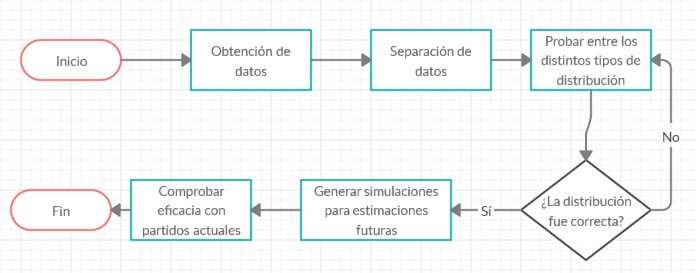


### 1.4 Nodos y variables que se decidieron simular y porqué
> A partir de datos obtenidos previamente, se decidió crear la distribución adecuada. Después, se tratará de separar los datos en partidos en casa, visitante, así como contra la posición del equipo contra el que se juega en la tabla, esto con el fin de crear variables con mayor independencia entre sí. Se simularán estos escenarios para estimar resultados de partidos.

### 1.5 Definición de hipótesis y supuestos.
> Para facilitar el modelado del proceso, se crean supuestos considerados verdaderos a lo largo del proceso. Por lo tanto, se decidió utilizar los siguientes supuestos:
1. Los datos visitante y local son independientes.
2. El equipo siempre es el mismo. Es decir, se consideran los datos del equipo como uno y no de los jugadores como individuos.
3. Nigún cambio en la formación interna tanto del club como institución como del equipo y cuerpo técnico mismo hace que se considere como un "equipo diferente". Es decir, el "nombre" del club es la representación de los datos.

### 1.6 Obtención de bases de datos
> Las bases de datos de los partidos se consiguen normalmente a través de compañías especializadas en datos deportivos para distintos usos. La recomendción que nos hicieron fue Sofascore www.sofascore.com. Al entrar pudimos observar que tiene toda la información necesaria para nostros, sobre todo considerando que nuestro enfoque es la liga doméstica, es decir la Liga MX. Entonces nuestra primera opción es esa.

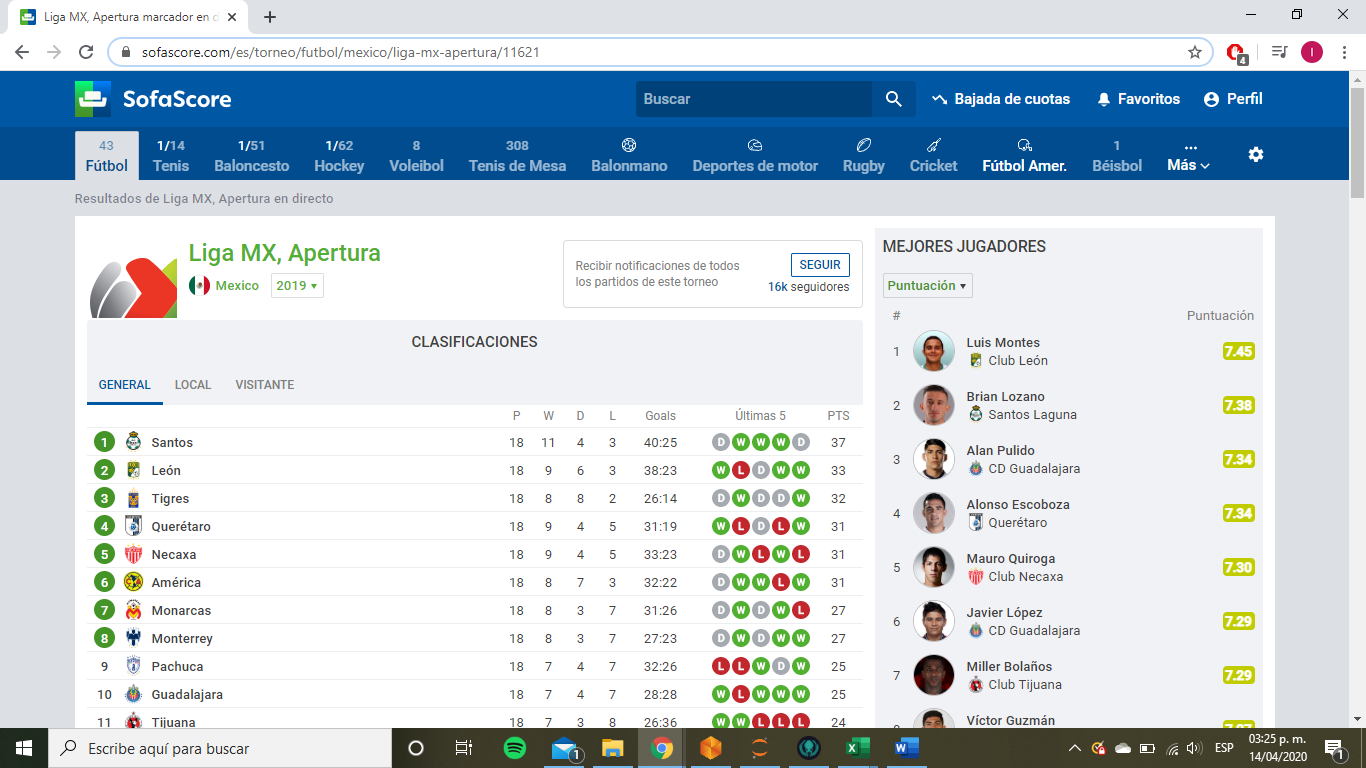

> En cuanto a la institución que vamos a simular es bastante sencillo, es la primera división del futbol profesional en México, es decir, la Liga MX (antes Primera División). Esta institución fundada en 1922 está a punto de cumplir cien años y está afiliada a la máxima autoridad del mundo del futbol, la FIFA.

> Sofascore es una empresa con más de 10 años de actividad, enfocada en satisfacer las necesidades de datos que las televisoras y los televidentes reclaman. Conforme pasó el tiempo y fue avanzando la tecnología, fueron incorporando más sectores de clientes gracias a que fueron añadiendo datos de más y más ligas.

> Un ejemplo de las variables que necesitamos es la cantidad de tiros al arco en determinado tiempo vs la cantidad de goles anotados en ese mismo periodo. Esto con el fin de ir construyendo nuestra simulación de goles esperados por equipo.


In [1]:
# Importamos paquetes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [76]:
data = pd.read_csv('../ProyectoModulo1Equipo1/DatosProyecto3.csv')
data['Ratio_TiroAGolxTiro'] = data['A_Gol']/data['Tiros']
data['Ratio_GolxTiro'] = data['Goles']/data['Tiros']
data['Ratio_GolxTiroAGol'] = data['Goles']/data['A_Gol']
data=data.fillna(0)
data

,Equipo,Tiros,A_Gol,Goles,Ratio_TiroAGolxTiro,Ratio_GolxTiro,Ratio_GolxTiroAGol
0,Monterrey,12.0,8.0,5.0,0.666667,0.416667,0.625000
1,Monterrey,20.0,6.0,2.0,0.300000,0.100000,0.333333
2,Monterrey,10.0,2.0,2.0,0.200000,0.200000,1.000000
3,Monterrey,9.0,5.0,3.0,0.555556,0.333333,0.600000
4,Monterrey,12.0,3.0,1.0,0.250000,0.083333,0.333333
5,Monterrey,25.0,11.0,4.0,0.440000,0.160000,0.363636
6,Monterrey,13.0,3.0,3.0,0.230769,0.230769,1.000000
7,Monterrey,9.0,0.0,0.0,0.000000,0.000000,0.000000
8,Monterrey,19.0,2.0,0.0,0.105263,0.000000,0.000000
9,Monterrey,24.0,6.0,1.0,0.250000,0.041667,0.166667


In [48]:
Monterrey = data.loc[data['Equipo'] == 'Monterrey']

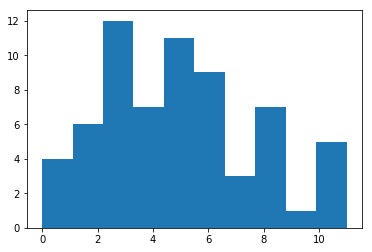

In [49]:
plt.hist(Monterrey['A_Gol'])
plt.show()

# Nodo 1
Tiros a gol por tiro

In [78]:
from sklearn.neighbors import KernelDensity
from scipy import optimize
from scipy.stats import gaussian_kde
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric.kernel_density import KDEMultivariate


def kde_scipy(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scipy"""
    # Note that scipy weights its bandwidth by the covariance of the
    # input data.  To make the results comparable to the other methods,
    # we divide the bandwidth by the sample standard deviation here.
    kde = gaussian_kde(x, bw_method=bandwidth / x.std(ddof=1), **kwargs)
    return kde.evaluate(x_grid)

#kde_funcs = [kde_statsmodels_u, kde_statsmodels_m, kde_scipy, kde_sklearn]
#kde_funcnames = ['Statsmodels-U', 'Statsmodels-M', 'Scipy', 'Scikit-learn']

print( "Package Versions:")
import sklearn; print( "  scikit-learn:", sklearn.__version__)
import scipy; print ("  scipy:", scipy.__version__)
import statsmodels; print( "  statsmodels:", statsmodels.__version__)

Package Versions:
  scikit-learn: 0.19.1
  scipy: 1.1.0
  statsmodels: 0.9.0


In [79]:
c = np.array(Monterrey['Ratio_TiroAGolxTiro'])

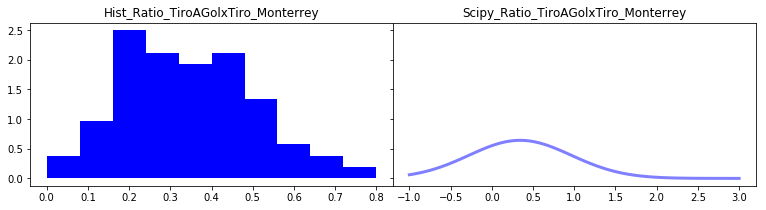

In [80]:
from scipy.stats.distributions import norm

# The grid we'll use for plotting
x_grid = np.linspace(-1, 3, 100)

# Draw points from a bimodal distribution in 1D
x = c

fig, ax = plt.subplots(1, 2, sharey=True,
                       figsize=(13, 3))
fig.subplots_adjust(wspace=0)

ax[0].hist(x, color='blue',density=True)
ax[0].set_title('Hist_Ratio_TiroAGolxTiro_Monterrey')


pdf = kde_scipy(x, x_grid, bandwidth=0.6)
ax[1].plot(x_grid, pdf, color='blue', alpha=0.5, lw=3)
ax[1].set_title('Scipy_Ratio_TiroAGolxTiro_Monterrey')
plt.show()

In [81]:
def Acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
#     R1 = np.random.rand(N)
    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))]
                
    plt.show()

In [84]:
# Función objetivo 
#f = lambda x,y:kde_scipy(x, y, bandwidth=0.2)
f = kde_scipy(x, x_grid, bandwidth=0.2)
# Máximo de la función f
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
# Función t -> Función constante
t = lambda x: max_f*np.ones(len(x)) # función constante

x = np.arange(0,1,0.01)  # Rango donde se graficará las funciones
print('El máximo de f es:',max_f)
# Gráficas de las funciones
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

# Validación del método
N = 200 # número de puntos a simular
# Como estoy tomando t(x) constante solo es necesario generar valores aleatorios U~(0,1)
R2 = np.random.rand(N)
R1 = np.random.rand(N)

Acep_rechazo(R2,R1,f,t)

TypeError: 'numpy.ndarray' object is not callable

# Nodo 2
Goles por tiro a gol

In [73]:
c2 = np.array(Monterrey['Ratio_GolxTiroAGol'])

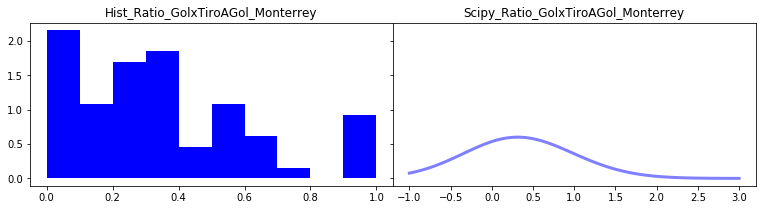

In [74]:
from scipy.stats.distributions import norm

# The grid we'll use for plotting
x_grid = np.linspace(-1, 3, 100)

# Draw points from a bimodal distribution in 1D
x = c2

fig, ax = plt.subplots(1, 2, sharey=True,
                       figsize=(13, 3))
fig.subplots_adjust(wspace=0)

ax[0].hist(x, color='blue',density=True)
ax[0].set_title('Hist_Ratio_GolxTiroAGol_Monterrey')


pdf = kde_scipy(x, x_grid, bandwidth=0.6)
ax[1].plot(x_grid, pdf, color='blue', alpha=0.5, lw=3)
ax[1].set_title('Scipy_Ratio_GolxTiroAGol_Monterrey')
plt.show()

### 1.7 Visualización de resultados de simulación.
> NA

### 1.8 Conclusiones.
> NA

### 1.7 Referencias.
> Citar (en formato APA) la bibliografía utilizada..